# imports 

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [55]:
data = pd.read_csv("csv_files/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
# Create an empty dictionary to store unique values for each column
uniques_dict = {}

# Iterate over each column in the DataFrame
for col in data.columns:
    # Get unique values in the current column and add them to the dictionary
    uniques_dict[col] = len(data[col].unique())

# Print the dictionary containing unique values for each column
print(uniques_dict)

{'PassengerId': 891, 'Survived': 2, 'Pclass': 3, 'Name': 891, 'Sex': 2, 'Age': 89, 'SibSp': 7, 'Parch': 7, 'Ticket': 681, 'Fare': 248, 'Cabin': 148, 'Embarked': 4}


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Cleaning

Drop all Non-Numeric features and Irrelevant Fields

In [58]:
cat_features = ['Name','PassengerId','Ticket','Sex','Embarked','Cabin']
data.drop(cat_features, axis = 1, inplace=True)

data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [59]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
data.groupby(data['Survived']).mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [62]:
data.groupby(data['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


## Visualizations:

#### Plot continuous features

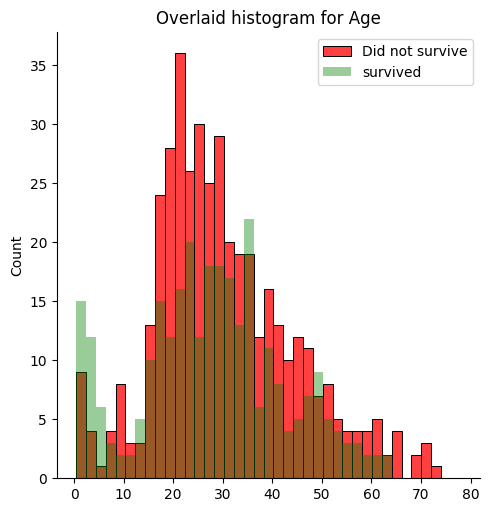

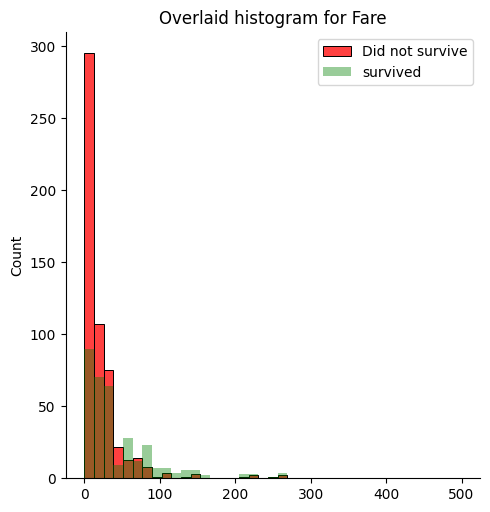

In [63]:
for i in ['Age','Fare']:
    died = list(data[data['Survived'] == 0][i].dropna())
    survived = list(data[data['Survived'] == 1][i].dropna())
    xmin = min (min(died), min(survived))
    xmax = max (max(died), max(survived))
    width = (xmax-xmin) / 40
    sns.displot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde = False, bins=np.arange(xmin, xmax, width))
    plt.legend(["Did not survive", "survived"])
    plt.title("Overlaid histogram for {}".format(i))
    plt.show()


<Figure size 640x480 with 0 Axes>

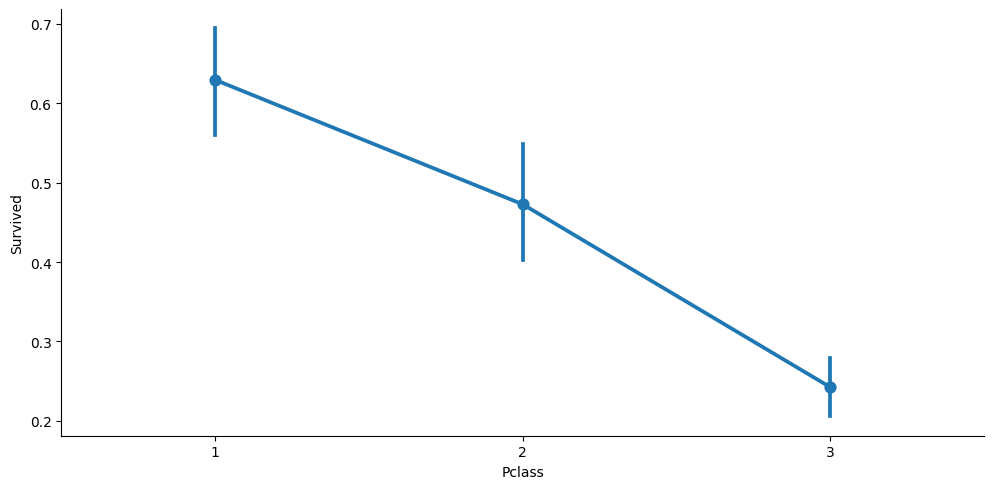

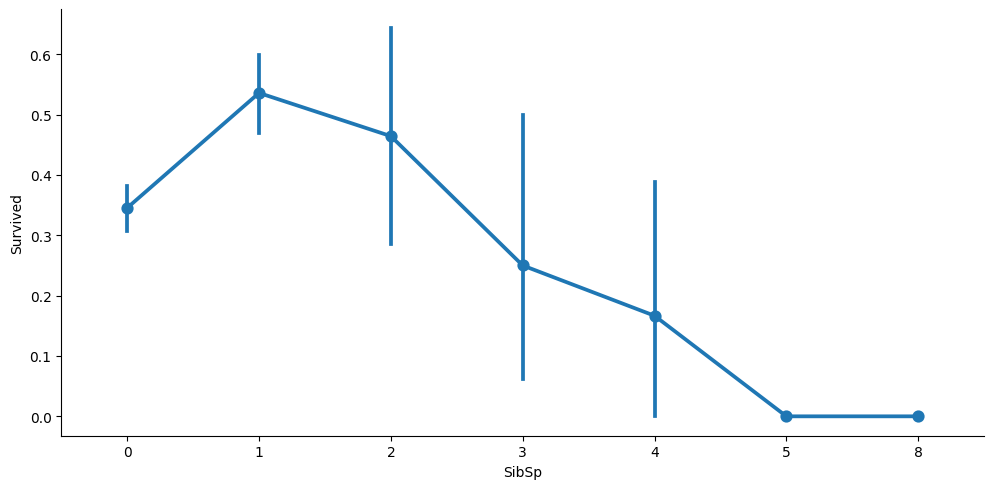

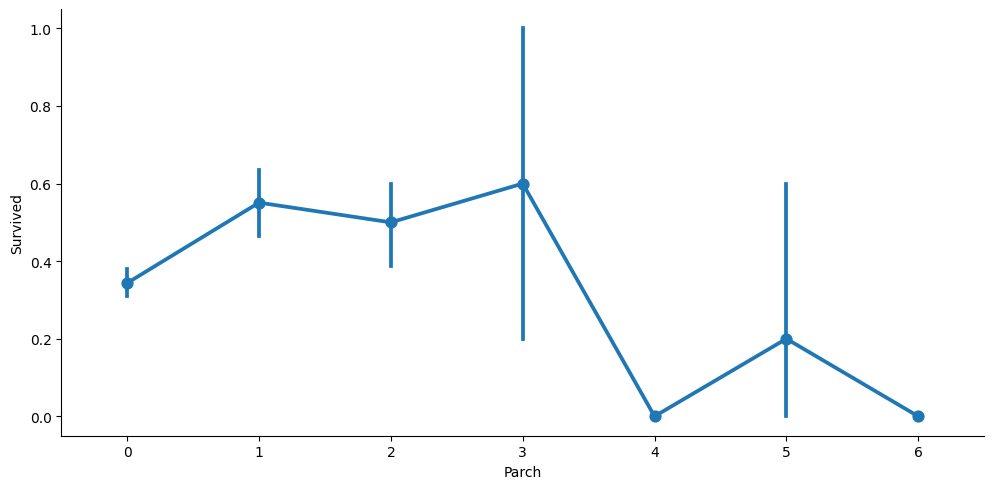

In [64]:
for i, col in enumerate(['Pclass','SibSp','Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=data, kind='point',aspect=2)

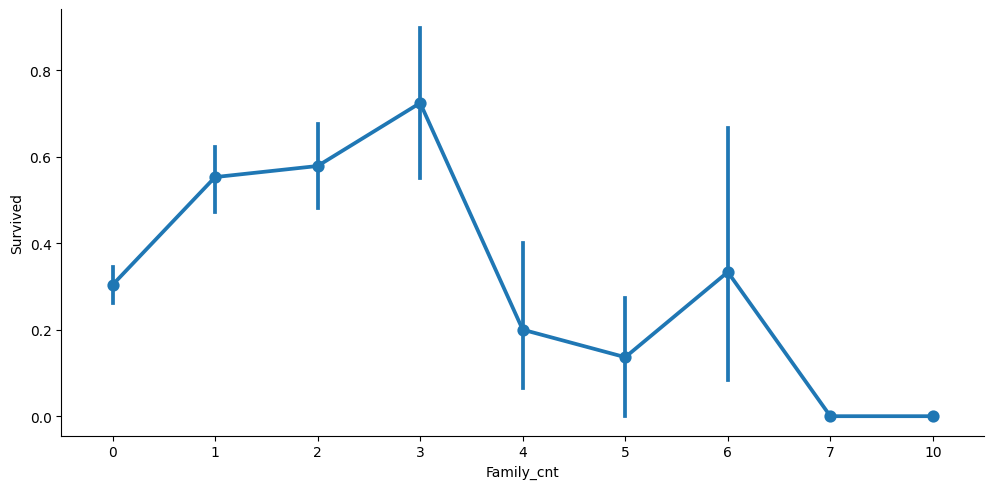

In [65]:
data['Family_cnt'] = data['SibSp']+data['Parch']
sns.catplot(x='Family_cnt', y='Survived', data=data, kind='point',aspect=2)

Now go ahead and drop the SibSp and Parch columns 

In [66]:
data.drop(['SibSp','Parch'], axis=1, inplace=True)

Dealing with missing values in Age Feature

In [68]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data.isnull().sum()

Survived      0
Pclass        0
Age           0
Fare          0
Family_cnt    0
dtype: int64

In [80]:
cont_features = ['PassengerId','Pclass','Name','Age','SibSp','Parch','Fare']
data = pd.read_csv("csv_files/train.csv")
data.drop(cont_features, axis=1, inplace=True)
data.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [91]:
data.groupby(data['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [92]:
data['Cabin_ind'] = np.where(data['Cabin'].isnull(), 0, 1)
data.head()

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_ind
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0


Categorical Variables Visualizations

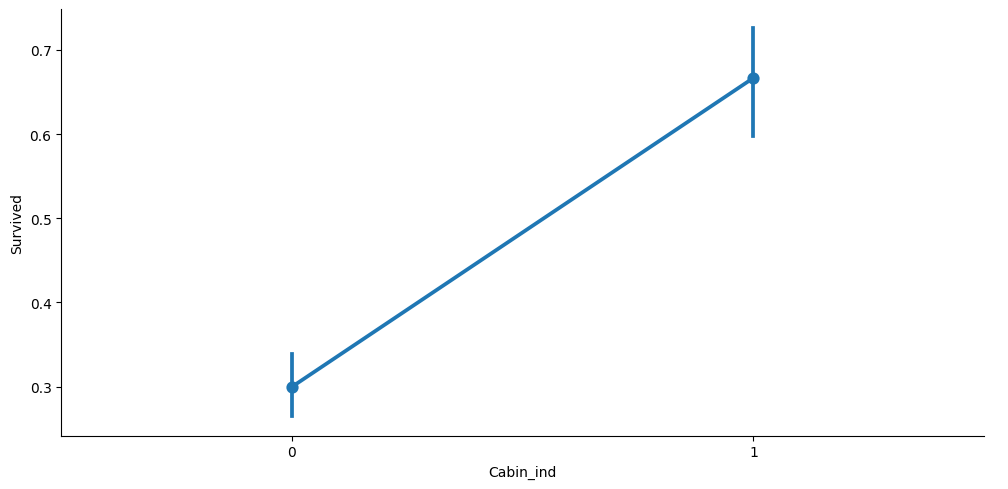

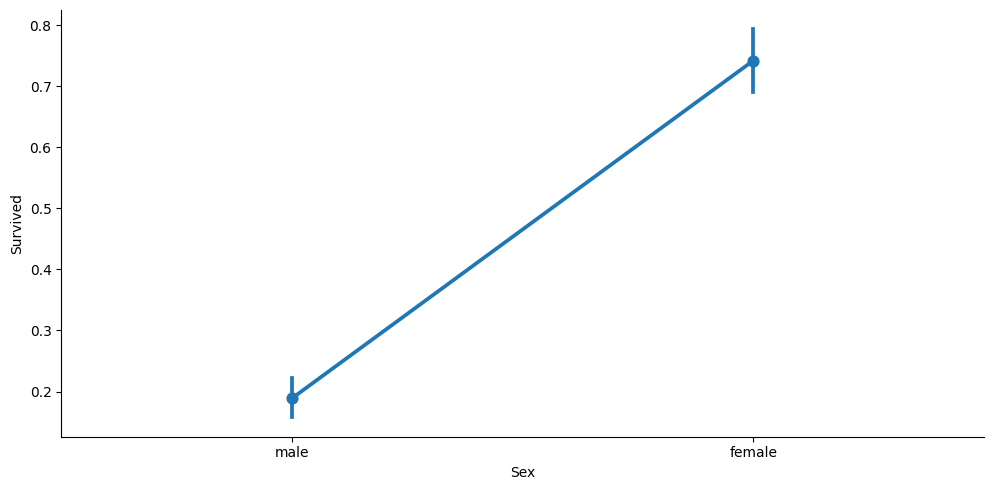

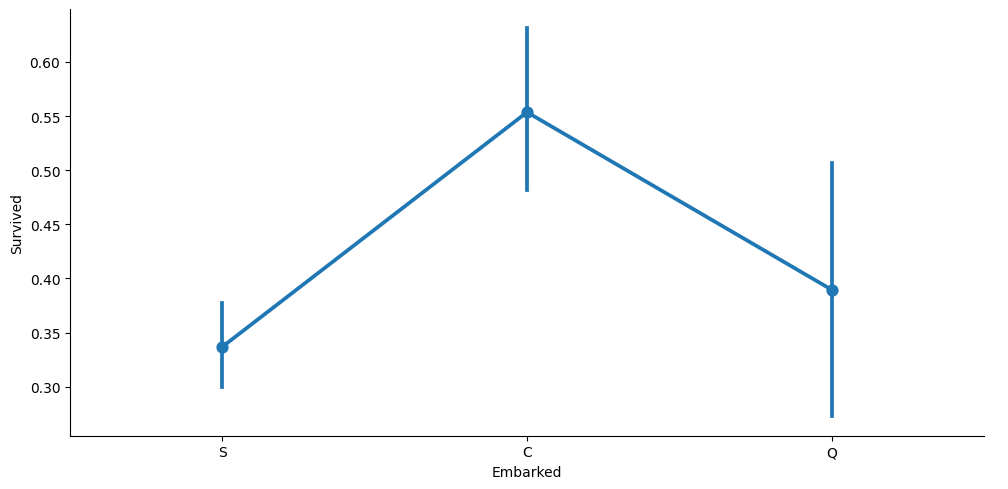

In [94]:
for i, col in enumerate(['Cabin_ind', 'Sex','Embarked']):
    sns.catplot(x=col, y='Survived', data=data, kind='point', aspect=2,)

In [95]:
data.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441
